# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [237]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn

Import the core data science libraries:

In [238]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [239]:
# place your code into this Code cell
data = pd.read_csv('data/data.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

### Show 5 rows, selected at random, from the data set.

In [240]:
data.sample(5)

,COUNTRY,Country,SERIES,Series,PERIOD,...,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2888,TUR,Türkiye,EXR,In 2022 constant prices at 2022 USD exchange r...,A,...,NaN,NaN,2801.537932,NaN,NaN
5036,CRI,Costa Rica,PPP,In 2022 constant prices at 2022 USD PPPs,A,...,NaN,NaN,9433.669734,NaN,NaN
2118,CAN,Canada,EXR,In 2022 constant prices at 2022 USD exchange r...,H,...,NaN,NaN,8.293930,NaN,NaN
164,TUR,Türkiye,EXR,In 2022 constant prices at 2022 USD exchange r...,H,...,NaN,NaN,1.010802,NaN,NaN
2261,FRA,France,EXR,In 2022 constant prices at 2022 USD exchange r...,H,...,NaN,NaN,11.244964,NaN,NaN


### Show each of the column names and their data types.

In [241]:
data.dtypes

COUNTRY                   object
Country                   object
SERIES                    object
Series                    object
PERIOD                    object
Pay period                object
TIME                       int64
Time                       int64
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                    float64
Flag Codes               float64
Flags                    float64
dtype: object

### Values in "TIME" and "Time" columns are the same, thus redundant

In [242]:
are_columns_identical = data['TIME'].equals(data['Time'])
print(are_columns_identical)

True


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

### 1. Delete any rows with value in "Value" column to be missing or undefined

In [243]:
data_cleaned_without_nan = data.dropna(subset=['Value'])
print(data_cleaned_without_nan.sample(5))

     COUNTRY        Country SERIES  \
4667     LVA         Latvia    EXR   
161      TUR        Türkiye    EXR   
1889     AUS      Australia    EXR   
3500     BEL        Belgium    EXR   
640      USA  United States    PPP   

                                                 Series PERIOD  ...  \
4667  In 2022 constant prices at 2022 USD exchange r...      H  ...   
161   In 2022 constant prices at 2022 USD exchange r...      H  ...   
1889  In 2022 constant prices at 2022 USD exchange r...      H  ...   
3500  In 2022 constant prices at 2022 USD exchange r...      A  ...   
640            In 2022 constant prices at 2022 USD PPPs      A  ...   

     Reference Period Code  Reference Period         Value Flag Codes Flags  
4667                   NaN               NaN      1.353666        NaN   NaN  
161                    NaN               NaN      0.958007        NaN   NaN  
1889                   NaN               NaN     12.108284        NaN   NaN  
3500                   NaN      

### 2. Delete redundant or unnecessary columns. 
- "COUNTRY" & "Country," "TIME" & "Time," "Unit Code" & "Unit," "SERIES" & "Series" are redundant, one of them is kept for readiness.
- Columns for reference code, power code, and flag code is meaningless for this analysis, thus removed

In [244]:
columns_to_remove = ['COUNTRY', 'PowerCode Code', 'PowerCode', 'Series', 'PERIOD', 'Reference Period Code','Reference Period', 'TIME', 'Unit', 'Flag Codes', 'Flags']
data_cleaned_first = data_cleaned_without_nan.drop(columns=columns_to_remove)
print(data_cleaned_first.sample(5))

      Country SERIES Pay period  Time Unit Code         Value
5108  Romania    EXR     Annual  2012       USD   2409.120907
3537   Greece    PPP     Hourly  1967       USD      4.263971
4300   Brazil    EXR     Hourly  1998       USD      0.501548
5382  Croatia    PPP     Hourly  2001       USD      3.629677
3797    Spain    PPP     Annual  1979       USD  15784.196959


### 3. Using PPP for the standard measure

In [245]:
data_cleaned_second = data_cleaned_first[~(data_cleaned_first['SERIES'] == 'EXR')]
print(data_cleaned_second.sample(5))

                 Country SERIES Pay period  Time Unit Code         Value
2814             Türkiye    PPP     Hourly  2022       USD      8.812431
1                Ireland    PPP     Annual  2001       USD  16423.708421
4490  Russian Federation    PPP     Hourly  2014       USD      1.697096
3714             Belgium    PPP     Hourly  2018       USD     12.592940
2802             Türkiye    PPP     Hourly  2010       USD      4.682173


### 4. Use Annual measure 

In [246]:
data_cleaned_third = data_cleaned_second[~(data_cleaned_second['Pay period'] == 'Hourly')]
print(data_cleaned_third.sample(5))

            Country SERIES Pay period  Time Unit Code         Value
623   United States    PPP     Annual  1981       USD  22427.489242
4764         Latvia    PPP     Annual  2009       USD   7232.100248
2398        Hungary    PPP     Annual  1991       USD   5242.309760
2653      Australia    PPP     Annual  1989       USD  21457.668597
1988        Belgium    PPP     Annual  1983       USD  27119.233143


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

### 1. The average 'Value' (real minimum wage) of each country across the time frame from 2000 to 2022
Results show that New Zealand has been raising national minimum wage (NMW) from 2000 to 2022, but generally the first 3 countries having the highest NMW haven't change over 22 years. This is also reasonable since it is difficult and unlikely for countries to drop NMW both economically and politically.

In [254]:
# Filter the DataFrame for the time frame from 2000 to 2022
data_time_frame = data_cleaned_third[(data_cleaned_third['Time'] >= 2000) & (data_cleaned_third['Time'] <= 2022)]

# Calculate the average 'Value' for each 'Country' in the time frame from 2000 to 2022
average_value_by_country = data_time_frame.groupby('Country')['Value'].mean()

# Sort the Series in descending order
average_value_by_country_sorted = average_value_by_country.sort_values(ascending=False)

# Print the sorted Series
print(average_value_by_country_sorted)

Country
Netherlands           28549.876122
Belgium               26512.414578
Luxembourg            26491.031572
Germany               26190.586259
Australia             25552.239625
France                23827.953647
New Zealand           21530.341314
United Kingdom        20643.481826
Ireland               19365.681425
Canada                19358.375740
United States         17669.464019
Spain                 16008.564158
Greece                15812.701858
Slovenia              15547.685530
Korea                 15434.213949
Malta                 15429.485572
Japan                 14920.128754
Israel                13904.901833
Portugal              12332.290814
Poland                11840.269482
Croatia               10933.761770
Türkiye               10854.602454
Czechia                9802.272845
Costa Rica             9316.483195
Lithuania              9041.656532
Hungary                8666.122600
Slovak Republic        8201.283528
Estonia                8114.281255
Colombia    

#### a. The average 'Value' (real minimum wage) of each country across the time frame in 2000

In [255]:
# Filter the DataFrame for entries from the year 2000
data_2000 = data_cleaned_third[data_cleaned_third['Time'] == 2000]

# Group by 'Country' and calculate the average 'Value'
average_value_2000= data_2000.groupby('Country')['Value'].mean()

# Sort the resulting Series in descending order
average_value_2000_sorted = average_value_2000.sort_values(ascending=False)

# Display the sorted Series
print(average_value_2000_sorted)

Country
Netherlands           27734.572458
Belgium               26119.470944
Australia             23896.413577
Luxembourg            23427.242024
France                20493.601732
United States         18205.107244
Canada                16774.573463
Ireland               16657.832597
New Zealand           16425.725010
United Kingdom        15622.212108
Greece                15265.633270
Malta                 14744.549113
Spain                 14057.330932
Japan                 12843.142961
Israel                12026.994455
Slovenia              11078.058619
Portugal              10687.485097
Croatia                8880.460564
Costa Rica             8258.213763
Korea                  8066.990046
Poland                 7346.878993
Türkiye                7277.460010
Colombia               6404.579798
Czechia                6142.472459
Lithuania              5396.686136
Slovak Republic        5215.377467
Chile                  4913.636872
Hungary                4289.454023
Estonia     

#### b. The average 'Value' (real minimum wage) of each country across the time frame in 2011

In [256]:
# Filter the DataFrame for entries from the year 2011
data_2011 = data_cleaned_second[data_cleaned_second['Time'] == 2011]

# Group by 'Country' and calculate the average 'Value'
average_value_2011 = data_2011.groupby('Country')['Value'].mean()

# Sort the resulting Series in descending order
average_value_2011_sorted = average_value_2011.sort_values(ascending=False)

# Display the sorted Series
print(average_value_2011_sorted)

Country
Netherlands           14342.986773
Belgium               13402.571785
Luxembourg            13303.931029
Australia             12615.993040
France                12106.421025
New Zealand           10558.146107
United Kingdom        10088.161032
Ireland                9852.070026
United States          9814.559992
Canada                 9660.465002
Greece                 8729.507231
Slovenia               8383.737017
Spain                  7812.426192
Malta                  7717.489883
Japan                  7461.598646
Korea                  7256.535703
Israel                 6406.113434
Portugal               6173.288658
Poland                 5505.466877
Croatia                5388.638416
Türkiye                5031.808906
Costa Rica             4600.373299
Czechia                4416.335576
Latvia                 3893.656254
Slovak Republic        3824.336184
Colombia               3713.435406
Hungary                3655.115162
Lithuania              3588.889655
Estonia     

#### c. The average 'Value' (real minimum wage) of each country across the time frame in 2011

In [257]:
# Filter the DataFrame for entries from the year 2022
data_2022 = data_cleaned_third[data_cleaned_third['Time'] == 2022]

# Group by 'Country' and calculate the average 'Value'
average_value_2022 = data_2022.groupby('Country')['Value'].mean()

# Sort the resulting Series in descending order
average_value_2022_sorted = average_value_2022.sort_values(ascending=False)

# Display the sorted Series
print(average_value_2022_sorted)

Country
Luxembourg         28148.843232
Netherlands        27095.850460
New Zealand        27041.320272
Australia          26894.876694
Belgium            26391.674918
Germany            26197.000000
France             25142.500000
United Kingdom     24550.864196
Korea              23729.982219
Canada             23138.970918
Ireland            20916.034190
Spain              20329.099072
Slovenia           19966.178862
Türkiye            18380.212957
Japan              17668.344488
Poland             17569.229916
Israel             15688.124941
Lithuania          15678.161002
Greece             15530.533305
Portugal           15394.333575
Malta              15219.881727
United States      15080.000000
Romania            15053.987732
Croatia            14494.139017
Hungary            12859.912446
Czechia            12686.902581
Slovak Republic    11837.572381
Estonia            11633.888295
Costa Rica         11024.312375
Bulgaria           10395.010000
Latvia             10080.221765


### 2. The average real minimum wage over time
Generally, minimum wage level is rising, implying economic developments.

In [258]:
# Calculate the average real minimum wage for each year
average_wage_per_year = data_cleaned_third.groupby('Time')['Value'].mean()
print(average_wage_per_year)

Time
1960    12105.174292
1961    13293.788130
1962    13681.817178
1963    13345.197822
1964    13648.740484
            ...     
2018    15926.268305
2019    16592.372394
2020    17165.126954
2021    17265.539037
2022    17222.333956
Name: Value, Length: 63, dtype: float64


### 3. Upper and lower bound of real minimum wage in 2020


In [252]:
# Choose the year for analysis
year_to_analyze = 2020

# Filter data for the chosen year
data_year = data_cleaned_third[data_cleaned_third['Time'] == year_to_analyze]

# Find the country with the highest real minimum wage
highest_wage_country = data_year.loc[data_year['Value'].idxmax()]

# Find the country with the lowest real minimum wage
lowest_wage_country = data_year.loc[data_year['Value'].idxmin()]

print(f"In {year_to_analyze}:")
print(f"Country with the highest real minimum wage: {highest_wage_country['Country']} - ${highest_wage_country['Value']}")
print(f"Country with the lowest real minimum wage: {lowest_wage_country['Country']} - ${lowest_wage_country['Value']}")

In 2020:
Country with the highest real minimum wage: Netherlands - $29306.3254068041
Country with the lowest real minimum wage: Mexico - $3110.42503016662


### 4. Upper and lower bound of real minimum wage in 2008
- vast differnce between upper and lower bound remains despite the Great Depression

In [259]:
# Choose the year for analysis
year_to_analyze = 2008

# Filter data for the chosen year
data_year = data_cleaned_third[data_cleaned_third['Time'] == year_to_analyze]

# Find the country with the highest real minimum wage
highest_wage_country = data_year.loc[data_year['Value'].idxmax()]

# Find the country with the lowest real minimum wage
lowest_wage_country = data_year.loc[data_year['Value'].idxmin()]

print(f"In {year_to_analyze}:")
print(f"Country with the highest real minimum wage: {highest_wage_country['Country']} - ${highest_wage_country['Value']}")
print(f"Country with the lowest real minimum wage: {lowest_wage_country['Country']} - ${lowest_wage_country['Value']}")

In 2008:
Country with the highest real minimum wage: Netherlands - $28464.8332019158
Country with the lowest real minimum wage: Mexico - $2059.88534900101


### 5. Upper and lower bound of real minimum wage in 2022
- the upper bound drops a bit comparing to 2008 - arguments concerning minimum wages

In [260]:
# Choose the year for analysis
year_to_analyze = 2022

# Filter data for the chosen year
data_year = data_cleaned_third[data_cleaned_third['Time'] == year_to_analyze]

# Find the country with the highest real minimum wage
highest_wage_country = data_year.loc[data_year['Value'].idxmax()]

# Find the country with the lowest real minimum wage
lowest_wage_country = data_year.loc[data_year['Value'].idxmin()]

print(f"In {year_to_analyze}:")
print(f"Country with the highest real minimum wage: {highest_wage_country['Country']} - ${highest_wage_country['Value']}")
print(f"Country with the lowest real minimum wage: {lowest_wage_country['Country']} - ${lowest_wage_country['Value']}")

In 2022:
Country with the highest real minimum wage: Luxembourg - $28148.8432319027
Country with the lowest real minimum wage: Mexico - $3826.67046159167


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

### 1. Top and Bottom Countries for Real Minimum Wage in 2017
- all top five countries are in europe - developed economy
- there has been quite a difference between the upper and lower bound - different economic progression that countries are at

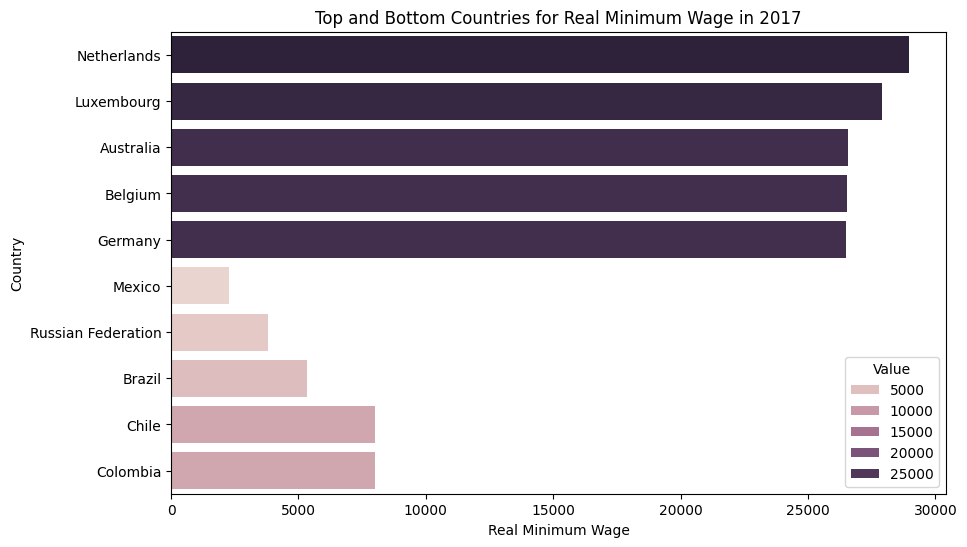

In [261]:
year_to_analyze = 2017
data_year = data_cleaned_third[data_cleaned_third['Time'] == year_to_analyze]

top_countries = data_year.nlargest(5, 'Value')
bottom_countries = data_year.nsmallest(5, 'Value')
top_bottom_countries = pd.concat([top_countries, bottom_countries])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_bottom_countries, x='Value', y='Country', hue='Value')
plt.title(f'Top and Bottom Countries for Real Minimum Wage in {year_to_analyze}')
plt.xlabel('Real Minimum Wage')
plt.ylabel('Country')
plt.show()

### 2. Comparing real minimum wage between US and Mexico
- apparently, Chile is a much less developed country than the US
- but generally, real minimum wage for Chile is rising, suggesting a steady growth

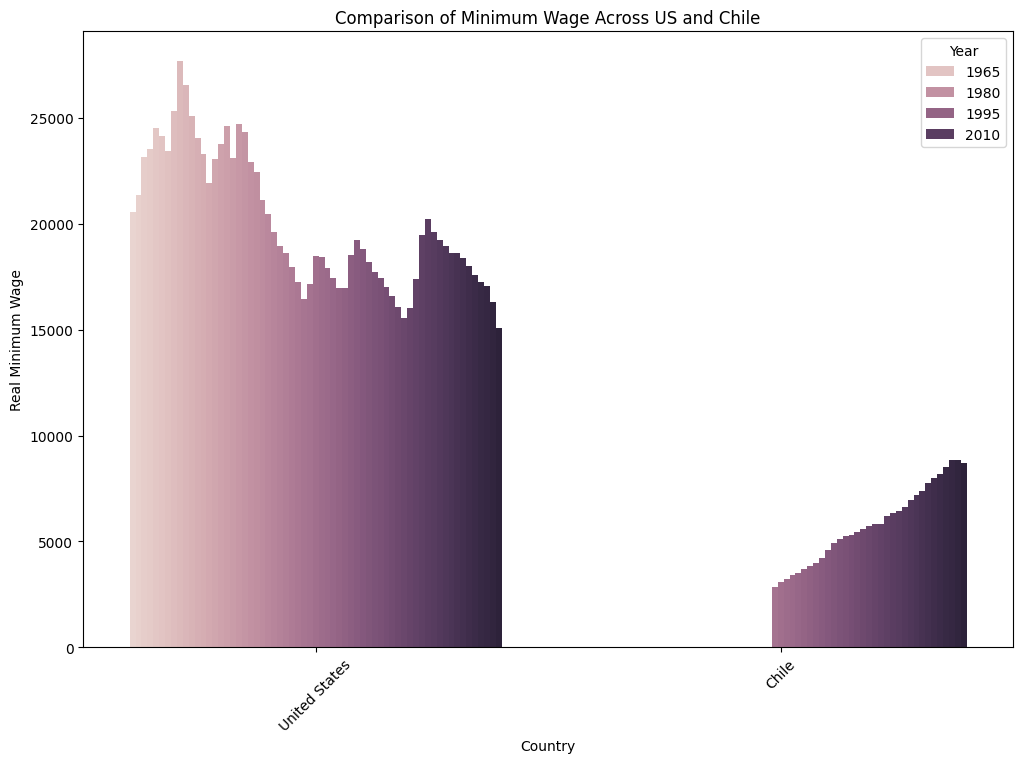

In [262]:
selected_countries = ['United States','Chile']
selected_data = data_cleaned_third[data_cleaned_third['Country'].isin(selected_countries)]

plt.figure(figsize=(12, 8))
sns.barplot(data=selected_data, x='Country', y='Value', hue='Time')
plt.title('Comparison of Minimum Wage Across US and Chile')
plt.xlabel('Country')
plt.ylabel('Real Minimum Wage')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()

### 3. Comparison between US and Mexico for annual growth rate of real minimum wage
- there has been a rapid growth for Mexico, demonstrating the large potential for the country's economy to grow.
- on the other hand, growth rate seems to be dropping for the States

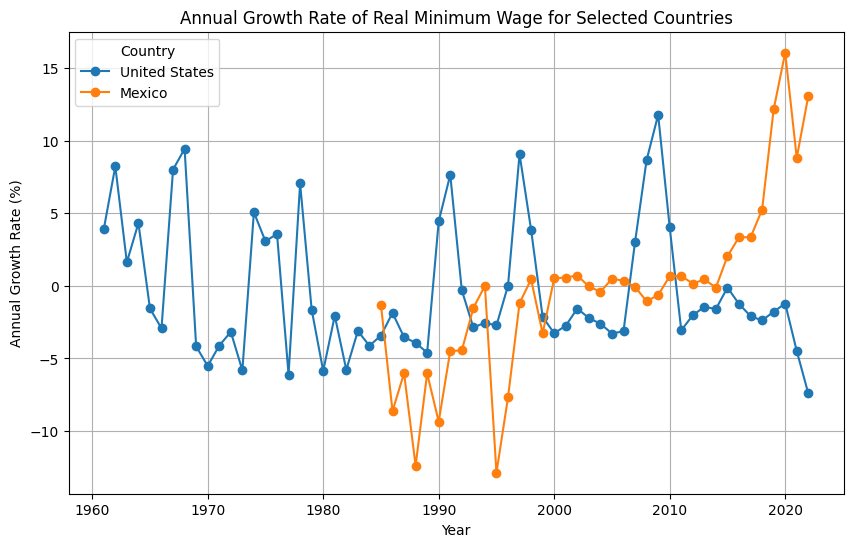

In [263]:
selected_countries = ['United States', 'Mexico']
data = data_cleaned_third.copy()

data['Time'] = data['Time'].astype(int)
data.sort_values(['Country', 'Time'], inplace=True)

data['Growth_Rate'] = data.groupby('Country')['Value'].pct_change() * 100  # Convert to percentage

plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_data = data[data['Country'] == country]
    if not country_data.empty:
        plt.plot(country_data['Time'], country_data['Growth_Rate'], marker='o', linestyle='-', label=country)

plt.title('Annual Growth Rate of Real Minimum Wage for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')
plt.legend(title='Country', loc='upper left')
plt.grid(True)
plt.show()

### 4. Annual growth rate of real minimum wage in Belgium
- with the upper bound 5% and lower bound -3%, it can be seen that there has been less volatile flucation of real minimum wage in Belgium, unlike countries like Mexico and the United States

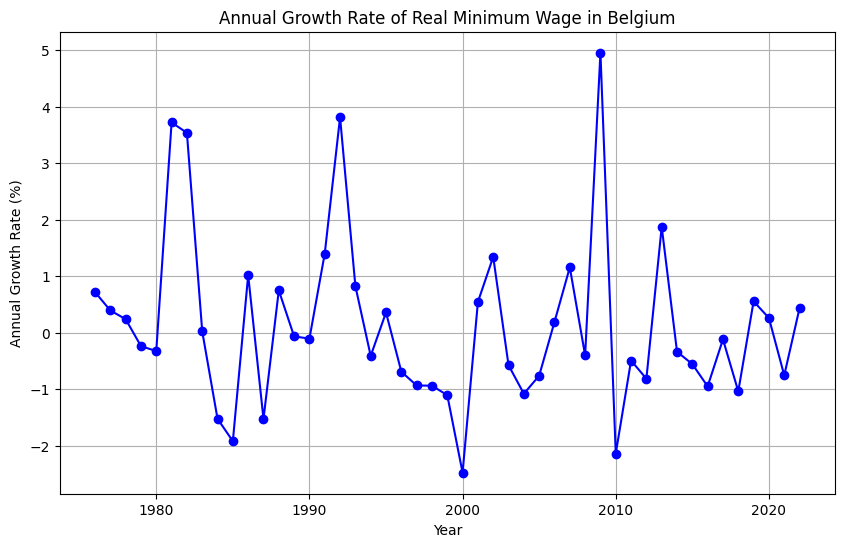

In [264]:
belgium_data = data_cleaned_third[data_cleaned_third['Country'] == 'Belgium'].copy()

belgium_data.sort_values('Time', inplace=True)

belgium_data['Growth_Rate'] = belgium_data['Value'].pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(belgium_data['Time'], belgium_data['Growth_Rate'], marker='o', linestyle='-', color='blue')
plt.title('Annual Growth Rate of Real Minimum Wage in Belgium')
plt.xlabel('Year')
plt.ylabel('Annual Growth Rate (%)')  # Added units to label
plt.grid(True)
plt.show()

### 5. Trend of real minimum wage over time
- shows fluctuation of minimum wage over years
- helps understand how the purchasing power of the minimum wage has changed due to inflation and other economic factors
- demonstrates different stages that national economies are at

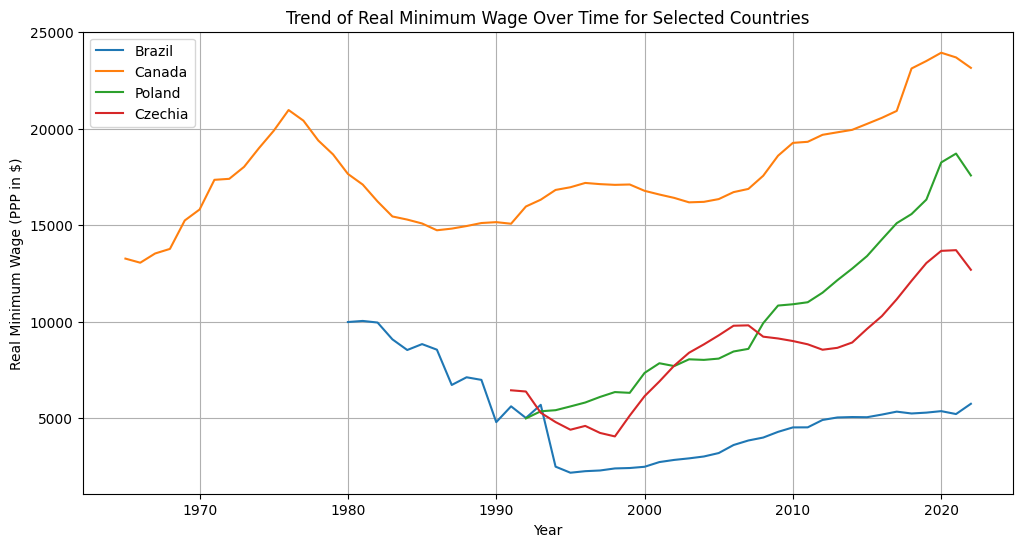

In [265]:
selected_countries = ['Brazil', 'Canada', 'Poland', 'Czechia']
filtered_data = data_cleaned_third[data_cleaned_third['Country'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Time'], country_data['Value'], label=country)

plt.title('Trend of Real Minimum Wage Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Real Minimum Wage (PPP in $)')
plt.legend()
plt.grid(True)
plt.show()